<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/TIC/Aula_08_Revisao_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/logo_mackenzie.png'>


# **Revisão: Problemas de classificação**

Nesta aula, faremos uma revisão sobre o problema de classificação e como usar o Aprendizado de Máquina para resolvê-los.

Usaremos como método de aprendizado de máquina a Árvore de Decisão.

# Preparando o conjunto de dados

Para o conjunto de dados, usaremos o [Bank Marketing](https://www.kaggle.com/c/bank-marketing-uci). Nele, temos informações sobre mais de 45 mil clientes de um determinado banco e, para cada cliente, se o mesmo subscreverá ou não um um depósito a prazo durante uma campanha de marketing. As variáveis de entrada (variáveis preditoras) são as seguintes:

1. `age`: idade,

2. `job`: profissão ('admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'),

3. `marital`: estado civil (categorical: 'divorced', 'married', 'single', 'unknown'; *nota*: 'divorced' significa 'divorced' ou 'widowed'),

4. `education`: escolaridade ('basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'),

5. `default`: se há empréstimos que não pagou, em *default* ('no', 'yes', 'unknown'),

6. `balance`: o saldo real na conta.

7. `housing`: se tem financiamento imobiliário ('no', 'yes', 'unknown'),

8. `loan`: se tem empréstimo pessoal ('no', 'yes', 'unknown'),

9. `contact`: tipo de contato ('cellular', 'telephone'),

10. `day`: dia da semana do último contato (categorical: 'mon','tue','wed','thu','fri'),

11. `month`: mês do último contato ('jan', 'feb', 'mar', …, 'nov', 'dec'),

12. `duration`: duração do último contato, em segundos. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

13. `campaign`: número de contatos feitos durante a campanha (inclui o último contato),

14. `pdays`: número de dias que se passaram após o contato anterior até o último contato, para esta campanha (999 significa que o cliente não foi contatato anteriormente),

15. `previous`: número de contatos feitos antes dessa campanha.

16. `poutcome`: resultado da campanha de marketing anterior ('failure', 'nonexistent', 'success')

Variável de saída: (que queremos prever):

- `y`: O cliente subscreveu o depósito a prazo? ('yes' ou 'no').

Para ilustrar o uso do Aprendizado de Máquina baseado na Árvore de Decisão, vamos considerar apenas os seguintes atributos (variáveis de entrada): `age`, `job`, `marital`, `education`, `default`, `balance`, `housing`, `loan` e `poutcome`.

Acesse o conjunto de dados (com todos os atributos) a partir do link abaixo:

https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_bank_marketing.csv



In [ ]:
# Leitura de dados

import pandas as pd
dados = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_bank_marketing.csv", sep = ";")
dados.head()

In [ ]:
# Remover linhas com células vazias

dados = dados.dropna()

In [ ]:
# Separando dados de entrada e de saída
X = dados[["age", "job", "marital", "education", "default", "balance", "housing", "loan","poutcome"]]
X

In [ ]:
# Separando dados de saída
y = dados[["y"]]
y

In [ ]:
# Conversão de variáveis categóricas em binárias
dummies1 = pd.get_dummies(X["job"])
dummies2 = pd.get_dummies(X["marital"])
dummies3 = pd.get_dummies(X["education"])
dummies4 = pd.get_dummies(X["default"])
dummies5 = pd.get_dummies(X["housing"])
dummies6 = pd.get_dummies(X["loan"])
dummies7 = pd.get_dummies(X["poutcome"])

X2 = pd.concat([X,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7], axis=1)
X2 = X2.drop(columns=["job", "marital", "education", "default", "housing", "loan","poutcome"])
X2

In [ ]:
# Separar dados de treinamento e teste
from sklearn.model_selection import train_test_split

seed = 20
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, stratify = y, random_state = seed)

In [ ]:
# Normalização
# Nesse caso, usando a árvore de decisão, essa etapa não é necessária

In [ ]:
# Declarar o modelo
from sklearn.tree import DecisionTreeClassifier
seed = 20
modelo = DecisionTreeClassifier(criterion = 'entropy', random_state = seed)

In [ ]:
# Treinamento
modelo.fit(X2_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [ ]:
# Teste
qualquernome_pred = modelo.predict(X2_test)
qualquernome_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

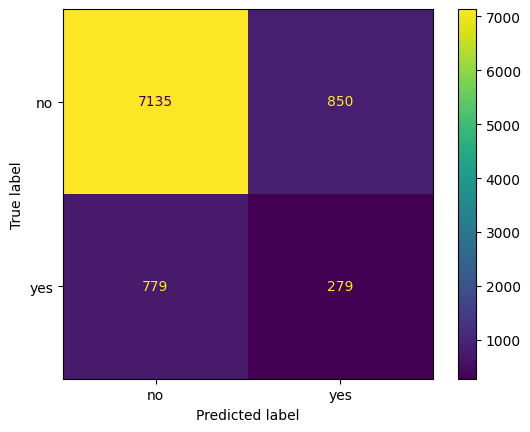

In [ ]:
# Avaliar o modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels=['no','yes'] #substitua o seu aqui de acordo com o que houver na coluna que definiu como "y"
cm = confusion_matrix(y_test, qualquernome_pred) #se preferir use , normalize='all' nos parênteses
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
# Acurácia
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,qualquernome_pred)
print(accuracy)

0.8198606657082826


In [ ]:
# Outras medidas de desempenho
from sklearn.metrics import classification_report

report = classification_report(y_test,qualquernome_pred)
print(report)

              precision    recall  f1-score   support

          no       0.90      0.89      0.90      7985
         yes       0.25      0.26      0.26      1058

    accuracy                           0.82      9043
   macro avg       0.57      0.58      0.58      9043
weighted avg       0.82      0.82      0.82      9043

